In [34]:
import scipy.spatial.distance as dist
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

plt.style.use('ggplot')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
%matplotlib inline 

### Data

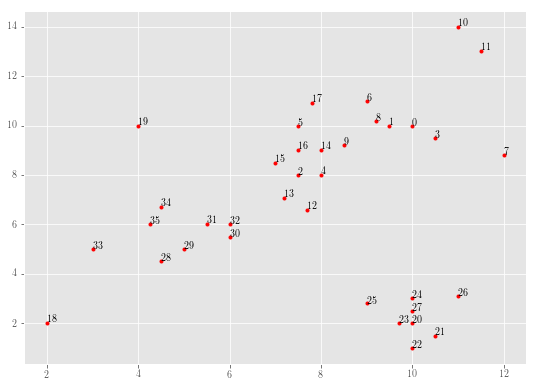

In [69]:
data = np.array([[10, 10], [9.5, 10], [7.5, 8], [10.5, 9.5], [8, 8], [7.5, 10], [9,11], [12, 8.8], [9.2, 10.2], [8.5, 9.2], [11, 14], [11.5, 13], [7.7, 6.6], [7.2, 7.05], 
                 [8, 9], [7, 8.5], [7.5, 9], [7.8, 10.9],
                 [2,2], [4,10], [10, 2], [10.5, 1.5], [10, 1], [9.7, 2], [10, 3], [9, 2.8], [11, 3.1], [10, 2.5], [4.5, 4.5], [5, 5], [6, 5.5], [5.5, 6], [6, 6], [3,5], [4.5, 6.7], [4.25, 6]])

x = [d[0] for d in data]
y = [d[1] for d in data]

plt.figure(figsize=(9, 6.5))

for i, d in enumerate(data):
    plt.plot(d[0], d[1], 'r.')
    plt.annotate(str(i), (d[0], d[1]))

## Alex Rodrigue's Approach

In [70]:
# Cutoff distance
cutoff = 3

In [71]:
def get_distance(p1, p2):
    p1 = np.array(p1).ravel()
    p2 = np.array(p2).ravel()
    return np.sum(dist.cdist([p1], [p2], 'euclidean'))

In [74]:
densities = []
for p in data:
    distances = [1 if get_distance(p, d) > cutoff else 0 for d in data]
    densities.append(np.sum(distances))
    
densities[:10]

[24, 22, 21, 27, 21, 23, 26, 32, 23, 21]

In [75]:
deltas = []
for i, p in enumerate(data):
    distances = [get_distance(p, d) for j, d in enumerate(data) if densities[j] > densities[i]]
    if distances == []:
        distances = [get_distance(p, d) for j, d in enumerate(data)]
        deltas.append(max(distances))
    else:
        deltas.append(min(distances))
    
deltas[:3]

[0.70710678118654757, 0.36055512754639912, 0.70710678118654757]

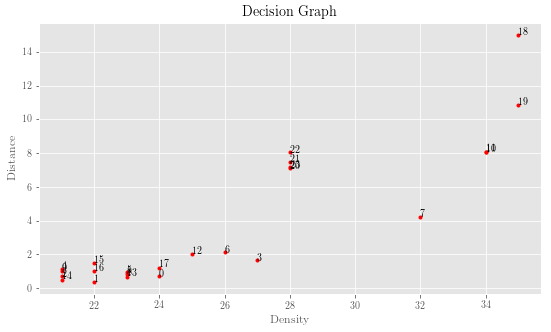

In [76]:
plt.figure(figsize=(9, 5))

for i in range(24):
    x = densities[i]
    y = deltas[i]
    plt.plot(x, y, 'r.')
    plt.annotate(str(i), (x, y))
    
plt.xlabel('Density')
plt.ylabel('Distance')
plt.title('Decision Graph')

Outliers can be spotted but cluster centers are not clear.

## K-Means Clustering

In [51]:
nclusters = 3
colors = ['r.', 'y.', 'g.', 'b.']

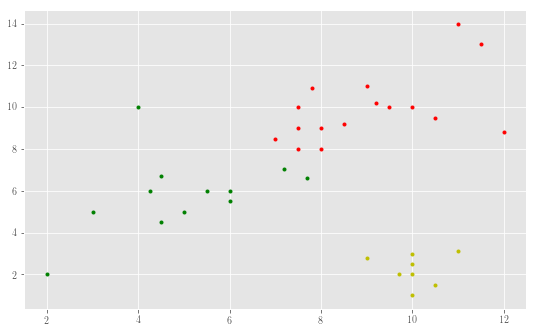

In [23]:
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(data)

decisions = kmeans.predict(data)  

plt.figure(figsize=(9, 5.5))
for i, d in enumerate(decisions):
    plt.plot(data[i][0], data[i][1], colors[d])

## Applying K-Means to Spatially Coded Words' Data

In [77]:
nclusters = 5
colors = ['r.', 'y.', 'g.', 'b.', 'k.']

In [78]:
words = ['able', 'above', 'across', 'add', 'against', 'ago', 'almost', 'among', 'animal', 'answer', 'became', 
         'become', 'began', 'behind', 'being', 'better', 'black', 'best', 'body', 'book', 'boy', 'brought', 'call', 
         'called', 'calling', 'can', 'cannot', 'car', 'care', 'certain', 'change', 'child', 'children', 'city',
         'cities', 'close', 'closet', 'cold', 'country', 'course', 'cut', 'dog', 'done', 'door', 'draw', 'during']

In [79]:
def get_grid(word):
    repeat = 5
    xrange = 26
    grid = [[0 for i in range(xrange)] for j in range(5)]
    w = 2
    u = 2
    offset = ord('a')

    for i, char in enumerate(word):
        index = ord(char) - offset
        for rep in range(repeat):
            if grid[rep][index] == 0:
                grid[rep][index] = pow(w, (len(word) - i - 1)) * u
                break
            else:
                continue
                
    return grid

In [80]:
data = [np.array(get_grid(word)).ravel() for word in words]
reduced_data = PCA(n_components=2).fit_transform(data)

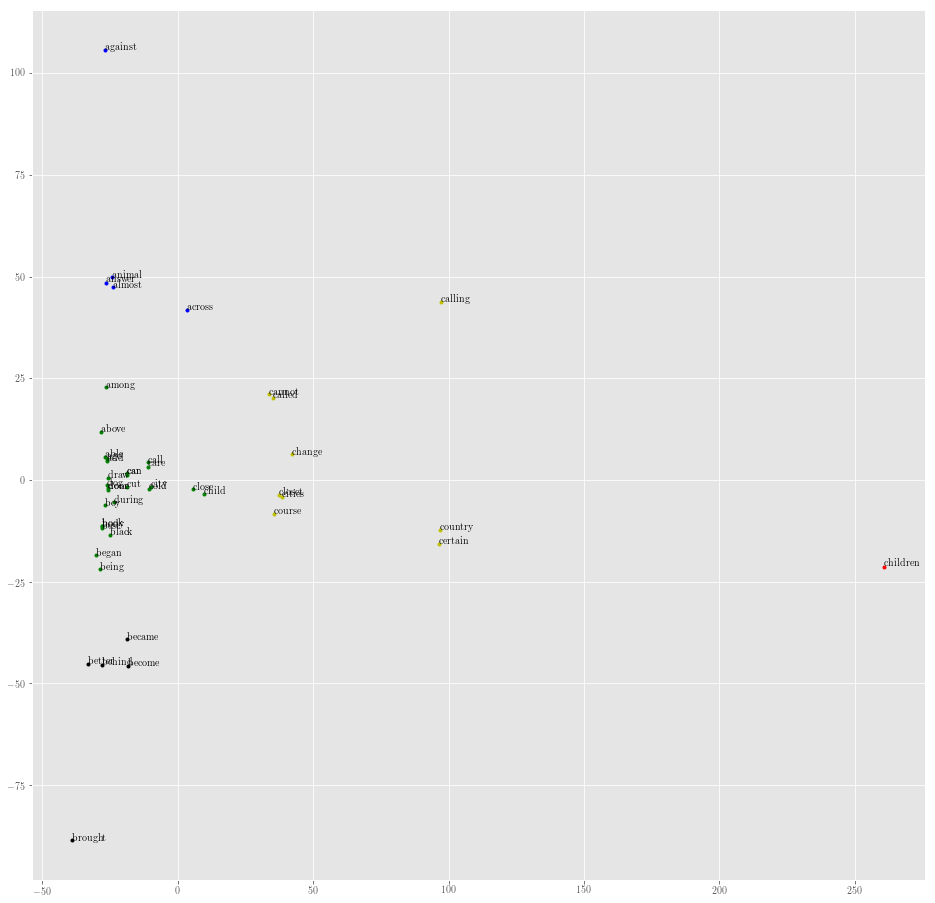

In [81]:
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(data)
decisions = kmeans.predict(data)

plt.figure(figsize=(16,16))
for i, d in enumerate(decisions):
    x = reduced_data[i][0]
    y = reduced_data[i][1]
    plt.plot(x, y, colors[d])
    plt.annotate(words[i], (x, y))